In [1]:
import pandas as pd

# Replace 'feature_df.csv' with the actual name of your CSV file
file_path = r'feature_df_2024.csv'

# Read the CSV file into a new DataFrame
new_feature_df = pd.read_csv(file_path)

# Now 'new_feature_df' contains the DataFrame you saved in the previous notebook


In [2]:
new_feature_df

,Symbol,Year,Percentage of Recurrence,Trapping Time,Laminarity,Recurrence Rate,Divergence,Max Vertical Length,Entropy of Vertical Structures,Mean Recurrence Time,Recurrence Time Entropy,Num Most Probable Recurrence Time
0,BTC-USD,2014,3431.107448,106,0.009434,3.053945e-03,0.009434,9.925939e+03,37.032076,34.311074,37.032076,0
1,BTC-USD,2015,5839.122796,365,0.002740,4.382936e-04,0.002740,7.039669e+04,99.560676,58.391228,99.560676,348
2,BTC-USD,2016,15616.514412,366,0.002732,1.165803e-03,0.002732,1.491189e+05,127.607009,156.165144,127.607009,362
3,BTC-USD,2017,381443.303921,365,0.002740,2.863173e-02,0.002740,5.654349e+06,-9532.144621,3814.433039,-9532.144621,349
4,BTC-USD,2018,256302.310096,365,0.002740,1.923845e-02,0.002740,3.633466e+06,-5261.430666,2563.023101,-5261.430666,5
...,...,...,...,...,...,...,...,...,...,...,...,...
964,JST-USD,2020,1.878642,239,0.004184,3.288940e-07,0.004184,1.275647e+01,0.176278,0.018786,0.176278,97
965,JST-USD,2021,3.270497,365,0.002740,2.454886e-07,0.002740,3.877119e+01,0.301972,0.032705,0.301972,104
966,JST-USD,2022,1.706623,365,0.002740,1.281017e-07,0.002740,1.739704e+01,0.169120,0.017066,0.169120,90
967,JST-USD,2023,0.453001,365,0.002740,3.400293e-08,0.002740,4.806165e+00,0.050976,0.004530,0.050976,304


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


c:\Users\ameiy\anaconda3\envs\ML4AlgoTrading\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of instances in each cluster:
Yearly_Cluster
0    634
1    260
4     65
3      7
2      3
Name: count, dtype: int64


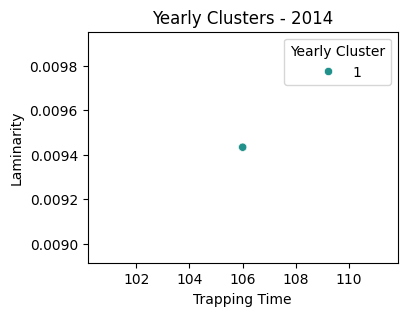

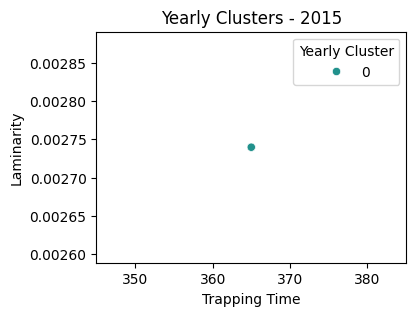

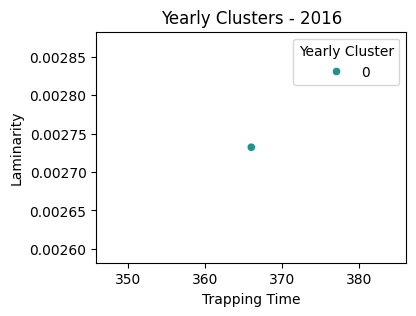

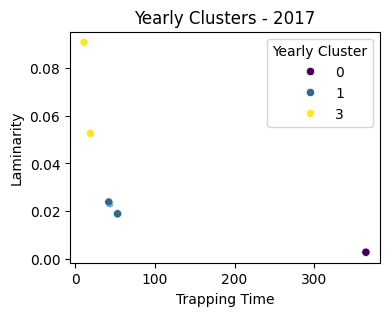

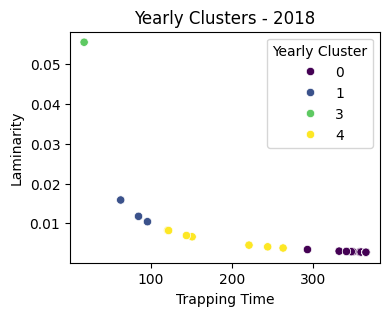

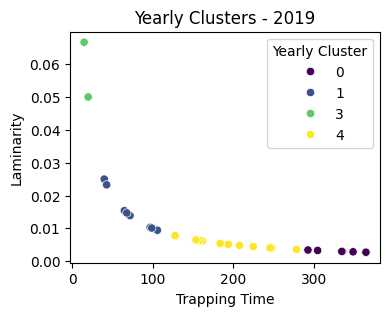

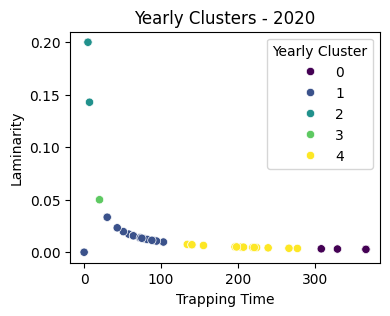

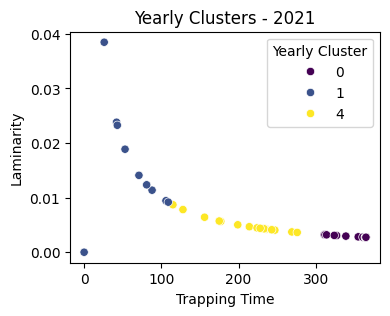

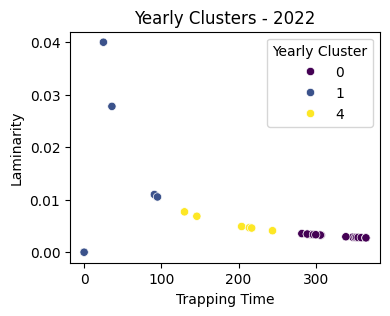

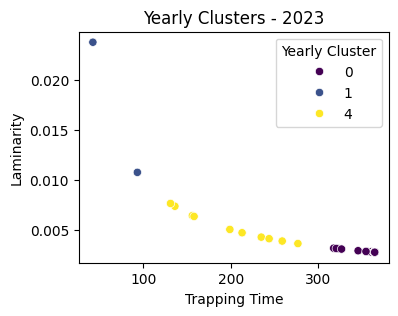

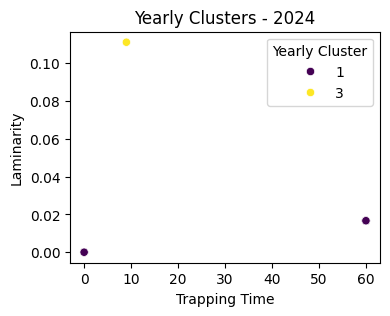

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def cluster_and_visualize(df, rqa_column_1, rqa_column_2, num_clusters=5):
    # Extract relevant columns
    X = df[[rqa_column_1, rqa_column_2]].values
    
    # Normalize the data
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters)
    df['Yearly_Cluster'] = kmeans.fit_predict(X_normalized)
    
    # Check the number of instances in each cluster
    cluster_counts = df['Yearly_Cluster'].value_counts()
    print("Number of instances in each cluster:")
    print(cluster_counts)
    
    # Visualize yearly clusters
    for year in df['Year'].unique():
        plt.figure(figsize=(4,3))
        
        # Filter DataFrame for the current year
        df_year = df[df['Year'] == year]
    
        # Scatter plot
        sns.scatterplot(x=rqa_column_1, y=rqa_column_2, hue='Yearly_Cluster', data=df_year, palette='viridis')
        
        # Title and labels
        plt.title(f'Yearly Clusters - {year}')
        plt.xlabel(rqa_column_1)
        plt.ylabel(rqa_column_2)
        
        # Optional: Add legend
        plt.legend(title='Yearly Cluster', loc='upper right')
        
        # Show the plot
        plt.show()

# Example usage:
# Replace 'new_feature_df', 'Percentage of Recurrence', and 'Recurrence Rate' with your actual DataFrame and column names
cluster_and_visualize(new_feature_df, 'Trapping Time', 'Laminarity')

In [5]:
new_feature_df

,Symbol,Year,Percentage of Recurrence,Trapping Time,Laminarity,Recurrence Rate,Divergence,Max Vertical Length,Entropy of Vertical Structures,Mean Recurrence Time,Recurrence Time Entropy,Num Most Probable Recurrence Time,Yearly_Cluster
0,BTC-USD,2014,3431.107448,106,0.009434,3.053945e-03,0.009434,9.925939e+03,37.032076,34.311074,37.032076,0,1
1,BTC-USD,2015,5839.122796,365,0.002740,4.382936e-04,0.002740,7.039669e+04,99.560676,58.391228,99.560676,348,0
2,BTC-USD,2016,15616.514412,366,0.002732,1.165803e-03,0.002732,1.491189e+05,127.607009,156.165144,127.607009,362,0
3,BTC-USD,2017,381443.303921,365,0.002740,2.863173e-02,0.002740,5.654349e+06,-9532.144621,3814.433039,-9532.144621,349,0
4,BTC-USD,2018,256302.310096,365,0.002740,1.923845e-02,0.002740,3.633466e+06,-5261.430666,2563.023101,-5261.430666,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,JST-USD,2020,1.878642,239,0.004184,3.288940e-07,0.004184,1.275647e+01,0.176278,0.018786,0.176278,97,4
965,JST-USD,2021,3.270497,365,0.002740,2.454886e-07,0.002740,3.877119e+01,0.301972,0.032705,0.301972,104,0
966,JST-USD,2022,1.706623,365,0.002740,1.281017e-07,0.002740,1.739704e+01,0.169120,0.017066,0.169120,90,0
967,JST-USD,2023,0.453001,365,0.002740,3.400293e-08,0.002740,4.806165e+00,0.050976,0.004530,0.050976,304,0


In [6]:
def process_yearly_data(df, start_year, end_year):
    # Create an empty DataFrame to hold all the processed data
    all_years_df = pd.DataFrame()

    for year in range(start_year, end_year + 1):
        # Filter the DataFrame for the specific year
        filtered_df = df[df['Year'] == year].copy()

        # Interchange 'Symbol' and 'Year' columns
        filtered_df = filtered_df.rename(columns={'Symbol': 'Year_temp', 'Year': 'Symbol'})
        filtered_df = filtered_df.rename(columns={'Year_temp': 'Year'})

        # Reset the column order to place 'Symbol' in the original 'Year' position and vice-versa
        cols = filtered_df.columns.tolist()
        symbol_index = cols.index('Symbol')
        year_index = cols.index('Year')
        cols[symbol_index], cols[year_index] = cols[year_index], cols[symbol_index]
        filtered_df = filtered_df[cols]

        # Interchange 'Symbol' and 'Year' column headers
        filtered_df.columns = ['Year' if col == 'Symbol' else 'Symbol' if col == 'Year' else col for col in filtered_df.columns]

        # Create a DataFrame with a date range for each year on a monthly interval
        date_ranges = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31", freq='MS').to_frame(index=False, name='Date')

        # Merge the date_ranges DataFrame with the original DataFrame
        # This will replicate the rows for each month in the year
        filtered_df_expanded = pd.merge(filtered_df, date_ranges, how='cross')

        # Now we can drop the unnecessary 'Year' column since 'Date' provides the same information
        filtered_df_expanded = filtered_df_expanded.drop('Year', axis=1)

        # Append the processed DataFrame to the all_years_df
        all_years_df = pd.concat([all_years_df, filtered_df_expanded], ignore_index=True)

    return all_years_df

# Apply the function to the original DataFrame for years 2014 to 2023
final_transformed_df = process_yearly_data(new_feature_df, 2014, 2023)

# final_transformed_df now contains the processed data for all years (2014 to 2023)

In [7]:
# Get the list of current column names
cols = final_transformed_df.columns.tolist()

# Move the last column to the first position
cols = [cols[-1]] + cols[:-1]

# Reorder the DataFrame with the new column order
final_transformed_df = final_transformed_df[cols]

# Verify the column order
print(final_transformed_df.columns)

Index(['Date', 'Symbol', 'Percentage of Recurrence', 'Trapping Time',
       'Laminarity', 'Recurrence Rate', 'Divergence', 'Max Vertical Length',
       'Entropy of Vertical Structures', 'Mean Recurrence Time',
       'Recurrence Time Entropy', 'Num Most Probable Recurrence Time',
       'Yearly_Cluster'],
      dtype='object')


In [8]:
final_transformed_df

,Date,Symbol,Percentage of Recurrence,Trapping Time,Laminarity,Recurrence Rate,Divergence,Max Vertical Length,Entropy of Vertical Structures,Mean Recurrence Time,Recurrence Time Entropy,Num Most Probable Recurrence Time,Yearly_Cluster
0,2014-01-01,BTC-USD,3431.107448,106,0.009434,3.053945e-03,0.009434,9925.938599,37.032076,34.311074,37.032076,0,1
1,2014-02-01,BTC-USD,3431.107448,106,0.009434,3.053945e-03,0.009434,9925.938599,37.032076,34.311074,37.032076,0,1
2,2014-03-01,BTC-USD,3431.107448,106,0.009434,3.053945e-03,0.009434,9925.938599,37.032076,34.311074,37.032076,0,1
3,2014-04-01,BTC-USD,3431.107448,106,0.009434,3.053945e-03,0.009434,9925.938599,37.032076,34.311074,37.032076,0,1
4,2014-05-01,BTC-USD,3431.107448,106,0.009434,3.053945e-03,0.009434,9925.938599,37.032076,34.311074,37.032076,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9463,2023-08-01,JST-USD,0.453001,365,0.002740,3.400293e-08,0.002740,4.806165,0.050976,0.004530,0.050976,304,0
9464,2023-09-01,JST-USD,0.453001,365,0.002740,3.400293e-08,0.002740,4.806165,0.050976,0.004530,0.050976,304,0
9465,2023-10-01,JST-USD,0.453001,365,0.002740,3.400293e-08,0.002740,4.806165,0.050976,0.004530,0.050976,304,0
9466,2023-11-01,JST-USD,0.453001,365,0.002740,3.400293e-08,0.002740,4.806165,0.050976,0.004530,0.050976,304,0


In [9]:
# Assuming 'Symbol' and 'cluster' are already columns in final_transformed_df
# We're going to set a MultiIndex with 'Date' and 'Symbol' and keep the attributes as columns
transformed_df = final_transformed_df.set_index(['Date', 'Symbol'])

# Make sure to sort the MultiIndex for efficient querying and slicing
transformed_df.sort_index(inplace=True)

# Display the transformed DataFrame
transformed_df

Percentage of Recurrence  Trapping Time  Laminarity  \
Date       Symbol                                                         
2014-01-01 BTC-USD               3431.107448            106    0.009434   
           LTC-USD                 52.951512            106    0.009434   
2014-02-01 BTC-USD               3431.107448            106    0.009434   
           LTC-USD                 52.951512            106    0.009434   
2014-03-01 BTC-USD               3431.107448            106    0.009434   
...                                      ...            ...         ...   
2023-12-01 XRP-USD                 11.338238            365    0.002740   
           XTZ-USD                 19.468254            365    0.002740   
           ZEC-USD                747.426671            365    0.002740   
           ZIL-USD                  0.564472            365    0.002740   
           ZRX-USD                  7.498926            365    0.002740   

                    Recurrence Rate  Divergence  Max Vertical Length  \
Date       Symbol                                                      
2014-01-01 BTC-USD     3.053945e-03    0.009434          9925.938599   
           LTC-USD     4.713085e-05    0.009434           143.860827   
2014-02-01 BTC-USD     3.053945e-03    0.009434          9925.938599   
           LTC-USD     4.713085e-05    0.009434           143.860827   
2014-03-01 BTC-USD     3.053945e-03    0.009434          9925.938599   
...                             ...         ...                  ...   
2023-12-01 XRP-USD     8.510658e-07    0.002740           112.391739   
           XTZ-USD     1.461317e-06    0.002740           197.603084   
           ZEC-USD     5.610300e-05    0.002740          6240.264189   
           ZIL-USD     4.237013e-08    0.002740             4.553314   
           ZRX-USD     5.628810e-07    0.002740           100.919709   

                    Entropy of Vertical Structures  Mean Recurrence Time  \
Date       Symbol                                                          
2014-01-01 BTC-USD                       37.032076             34.311074   
           LTC-USD                        2.761083              0.529515   
2014-02-01 BTC-USD                       37.032076             34.311074   
           LTC-USD                        2.761083              0.529515   
2014-03-01 BTC-USD                       37.032076             34.311074   
...                                            ...                   ...   
2023-12-01 XRP-USD                        0.909660              0.113382   
           XTZ-USD                        1.460443              0.194683   
           ZEC-USD                       28.685976              7.474267   
           ZIL-USD                        0.062329              0.005645   
           ZRX-USD                        0.628501              0.074989   

                    Recurrence Time Entropy  \
Date       Symbol                             
2014-01-01 BTC-USD                37.032076   
           LTC-USD                 2.761083   
2014-02-01 BTC-USD                37.032076   
           LTC-USD                 2.761083   
2014-03-01 BTC-USD                37.032076   
...                                     ...   
2023-12-01 XRP-USD                 0.909660   
           XTZ-USD                 1.460443   
           ZEC-USD                28.685976   
           ZIL-USD                 0.062329   
           ZRX-USD                 0.628501   

                    Num Most Probable Recurrence Time  Yearly_Cluster  
Date       Symbol                                                      
2014-01-01 BTC-USD                                  0               1  
           LTC-USD                                  0               1  
2014-02-01 BTC-USD                                  0               1  
           LTC-USD                                  0               1  
2014-03-01 BTC-USD                                  0               1  
..

In [10]:
transformed_df = transformed_df[transformed_df.index.get_level_values('Date') >= pd.Timestamp('2019-09-30')]
transformed_df

Percentage of Recurrence  Trapping Time  Laminarity  \
Date       Symbol                                                          
2019-10-01 ADA-USD                   2.008555            365    0.002740   
           AGIX-USD                  1.377091            365    0.002740   
           ALGO-USD                 36.209799            194    0.005155   
           ARB-USD                   0.020662            365    0.002740   
           ATOM-USD                127.260630            293    0.003413   
...                                       ...            ...         ...   
2023-12-01 XRP-USD                  11.338238            365    0.002740   
           XTZ-USD                  19.468254            365    0.002740   
           ZEC-USD                 747.426671            365    0.002740   
           ZIL-USD                   0.564472            365    0.002740   
           ZRX-USD                   7.498926            365    0.002740   

                     Recurrence Rate  Divergence  Max Vertical Length  \
Date       Symbol                                                       
2019-10-01 ADA-USD      1.507653e-07    0.002740            15.410422   
           AGIX-USD     1.033666e-07    0.002740             9.425203   
           ALGO-USD     9.621310e-06    0.005155           526.008075   
           ARB-USD      1.550899e-09    0.002740             0.236311   
           ATOM-USD     1.482395e-05    0.003413          1030.304859   
...                              ...         ...                  ...   
2023-12-01 XRP-USD      8.510658e-07    0.002740           112.391739   
           XTZ-USD      1.461317e-06    0.002740           197.603084   
           ZEC-USD      5.610300e-05    0.002740          6240.264189   
           ZIL-USD      4.237013e-08    0.002740             4.553314   
           ZRX-USD      5.628810e-07    0.002740           100.919709   

                     Entropy of Vertical Structures  Mean Recurrence Time  \
Date       Symbol                                                           
2019-10-01 ADA-USD                         0.195942              0.020086   
           AGIX-USD                        0.140033              0.013771   
           ALGO-USD                        2.216196              0.362098   
           ARB-USD                         0.002965              0.000207   
           ATOM-USD                        6.834637              1.272606   
...                                             ...                   ...   
2023-12-01 XRP-USD                         0.909660              0.113382   
           XTZ-USD                         1.460443              0.194683   
           ZEC-USD                        28.685976              7.474267   
           ZIL-USD                         0.062329              0.005645   
           ZRX-USD                         0.628501              0.074989   

                     Recurrence Time Entropy  \
Date       Symbol                              
2019-10-01 ADA-USD                  0.195942   
           AGIX-USD                 0.140033   
           ALGO-USD                 2.216196   
           ARB-USD                  0.002965   
           ATOM-USD                 6.834637   
...                                      ...   
2023-12-01 XRP-USD                  0.909660   
           XTZ-USD                  1.460443   
           ZEC-USD                 28.685976   
           ZIL-USD                  0.062329   
           ZRX-USD                  0.628501   

                     Num Most Probable Recurrence Time  Yearly_Cluster  
Date       Symbol                                                       
2019-10-01 ADA-USD                                 174               0  
           AGIX-USD                                149               0  
           ALGO-USD                                  0               4  
           ARB-USD                                 175               0  
           ATOM-U

In [11]:
# Initialize a dictionary to store the fixed_dates for each cluster
clusters_fixed_dates = {}

# Loop through clusters 0 to 4
for cluster_num in range(5):
    # Filter the DataFrame for rows where the 'cluster' column equals the current cluster number
    filtered_df = transformed_df[transformed_df['Yearly_Cluster'] == cluster_num].copy()

    # Reset the index to separate the 'Date' from the MultiIndex for manipulation
    filtered_df = filtered_df.reset_index()

    # Adjust the 'Date' using pd.DateOffset by adding 1 day
    filtered_df['Date'] = filtered_df['Date'] + pd.DateOffset(1)

    # Resetting index again and setting new index with 'Date' and 'Symbol' (or 'ticker')
    filtered_df = filtered_df.set_index(['Date', 'Symbol'])

    # Get unique dates for this cluster's data
    dates = filtered_df.index.get_level_values('Date').unique().tolist()

    # Initialize the dictionary for the current cluster
    fixed_dates = {}

    # Loop through the dates to create the mapping for the current cluster
    for d in dates:
        # Using strftime to format date as a string
        formatted_date = d.strftime('%Y-%m-%d')

        # Extract the list of symbols ('ticker') for the given date
        fixed_dates[formatted_date] = filtered_df.xs(d, level=0).index.tolist()

    # Store the result in the main dictionary using the current cluster number as the key
    clusters_fixed_dates[cluster_num] = fixed_dates

# View the result
for cluster_num, fixed_dates in clusters_fixed_dates.items():
    print(f"Cluster {cluster_num}:")
    print(fixed_dates)

Cluster 0:
{'2019-10-02': ['ADA-USD', 'AGIX-USD', 'ARB-USD', 'ATOM-USD', 'BAT-USD', 'BCH-USD', 'BEAM-USD', 'BNB-USD', 'BTC-USD', 'BTG-USD', 'BTT-USD', 'CRO-USD', 'DASH-USD', 'DOGE-USD', 'ELF-USD', 'ENJ-USD', 'EOS-USD', 'ETC-USD', 'ETH-USD', 'FET-USD', 'FIL-USD', 'FTM-USD', 'GAS-USD', 'GNO-USD', 'HOT2682-USD', 'HT-USD', 'IOTX-USD', 'JUP-USD', 'KCS-USD', 'LINK-USD', 'LRC-USD', 'LTC-USD', 'MANA-USD', 'MKR-USD', 'NEO-USD', 'NEXO-USD', 'QNT-USD', 'QTUM-USD', 'RPL-USD', 'SC-USD', 'SNX-USD', 'THETA-USD', 'TRAC-USD', 'TRX-USD', 'USDC-USD', 'USDP-USD', 'USDT-USD', 'VET-USD', 'WBTC-USD', 'XDC-USD', 'XEM-USD', 'XLM-USD', 'XMR-USD', 'XRP-USD', 'XTZ-USD', 'ZEC-USD', 'ZIL-USD', 'ZRX-USD'], '2019-11-02': ['ADA-USD', 'AGIX-USD', 'ARB-USD', 'ATOM-USD', 'BAT-USD', 'BCH-USD', 'BEAM-USD', 'BNB-USD', 'BTC-USD', 'BTG-USD', 'BTT-USD', 'CRO-USD', 'DASH-USD', 'DOGE-USD', 'ELF-USD', 'ENJ-USD', 'EOS-USD', 'ETC-USD', 'ETH-USD', 'FET-USD', 'FIL-USD', 'FTM-USD', 'GAS-USD', 'GNO-USD', 'HOT2682-USD', 'HT-USD', 'IOTX-